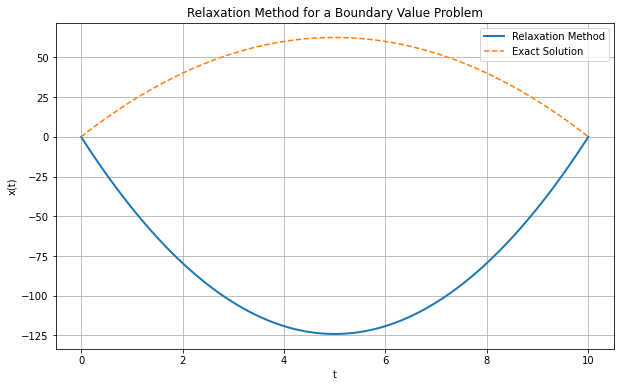

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def relaxation_method(n, t1, g, tol=1e-6, max_iter=10000):
    h = t1 / n
    t = np.linspace(0, t1, n+1)
    x = np.zeros(n+1) 
    x_new = np.zeros(n+1)
    
    for iteration in range(max_iter):
        for i in range(1, n):
            x_new[i] = 0.5 * (x[i-1] + x[i+1] + h**2 * g)
        x_new[0] = 0  # x(0) = 0
        x_new[-1] = 0  # x(t1) = 0
        # Check for convergence
        if np.linalg.norm(x_new - x, np.inf) < tol:
            break
        x[:] = x_new

    return t, x, iteration

# Parameters
n = 100
t1 = 10
g = -10  # Acceleration due to gravity

#Relaxation method
t, x, iterations = relaxation_method(n, t1, g)

# Exact solution
c = -g * t1**2 / 4
exact_solution = c * (t/t1) * (1 - t/t1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Relaxation Method', linewidth=2)
plt.plot(t, exact_solution, label='Exact Solution', linestyle='--')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Relaxation Method for a Boundary Value Problem')
plt.legend()
plt.grid(True)
plt.show()